In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'COy1','ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2',
       'COy2','ATy2','PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3',
        'ATy3','year', 'month', 'day']]
Y1 = df['NH3']

In [68]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=18)

In [69]:
grad_boost = GradientBoostingRegressor(n_estimators=1500,
                                      max_depth=8,
                                      max_features=0.25,
                                      min_samples_split=4,
                                      min_samples_leaf=6,
                                      learning_rate=0.01)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=8, max_features=0.25,
                          min_samples_leaf=6, min_samples_split=4,
                          n_estimators=1500)

In [70]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9979550600312188

Score on test data: 0.6770989532288466

Root Mean Squared Error: 9.021732341608608

Overall model accuracy: 0.6770989532288466


In [71]:
test=data.loc['207':'259']
X=test[['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'COy1','ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2',
       'COy2','ATy2','PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3',
        'ATy3','year', 'month', 'day']]
X

,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,COy1,ATy1,PM2.5y2,PM1y2,...,PM1y3,NOy3,NO2y3,NOxy3,NH3y3,COy3,ATy3,year,month,day
207,302.818571,428.861429,125.535714,76.847143,144.901429,32.607143,2.175714,8.394286,217.428571,371.975714,...,416.398571,100.627143,83.730000,212.015714,56.007143,2.998571,12.122857,2019,12,29
208,316.292857,456.537143,109.870000,52.067143,117.267143,29.011429,1.537714,8.800000,264.292857,452.655714,...,332.717143,98.832857,67.225714,194.864286,57.234286,3.004286,10.478571,2020,1,5
209,241.932857,349.680000,84.832857,58.215714,100.144286,31.015714,0.970000,11.971429,191.864286,344.172857,...,282.434286,101.944286,57.842857,190.755714,48.108571,2.867143,12.764286,2020,1,12
210,253.915714,405.144286,117.140000,58.545714,126.631429,28.408571,1.768000,9.905714,237.660000,405.398571,...,346.604286,94.412857,75.028571,195.770000,43.388571,2.740000,8.177143,2020,1,19
211,128.998571,223.215604,34.865714,44.648571,52.171429,23.565714,2.566000,10.632857,173.172857,302.185714,...,237.858571,49.015714,68.434286,127.910000,44.487143,1.844286,9.742857,2020,1,26
212,187.365714,225.330769,47.905714,49.550000,65.417143,23.558571,2.305429,9.834286,143.550000,284.925714,...,251.350000,74.012857,62.091429,156.391429,42.347143,2.127143,13.330000,2020,2,2
213,146.527143,198.920769,65.595714,50.381429,80.275714,22.507143,1.334286,11.920000,193.068571,331.052857,...,328.171429,153.021429,66.960000,268.622857,39.584286,2.754286,13.437143,2020,2,9
214,193.267143,333.581429,73.142857,72.708571,98.288571,27.225714,1.971429,13.324286,109.957143,204.577143,...,279.338571,50.672857,67.874286,129.678571,30.340000,1.890000,13.547143,2020,2,16
215,110.288571,192.155714,68.825714,73.708571,96.087143,27.742857,1.424286,15.858571,166.732857,330.682857,...,275.608571,34.234286,82.401429,120.168571,37.265714,1.715714,16.775714,2020,2,23
216,108.875000,172.547857,86.743571,88.330000,117.698571,27.334286,1.810714,12.517143,109.975714,228.510000,...,280.377143,38.925714,62.438571,108.778571,26.370000,1.704286,17.097143,2020,3,1


In [72]:
predict=grad_boost.predict(X)

In [73]:
predict

array([29.27655577, 50.53277962, 30.72979965, 33.99365164, 32.13508353,
       27.30690357, 30.69462735, 28.58098019, 28.60076101, 31.51739293,
       30.8392191 , 31.10849825, 28.41674055, 29.09726684, 31.82081342,
       27.59689215, 22.53188885, 29.44442286, 25.00315513, 33.1452516 ,
       27.78076544, 27.9463701 , 26.62644472, 25.30735089, 29.64247403,
       25.59744915, 27.03793392, 25.96026423, 26.48247371, 22.68456565,
       21.8767041 , 21.5723862 , 19.87391645, 20.36212968, 20.0294131 ,
       18.9502736 , 25.70828675, 24.49636286, 24.95644026, 25.97997859,
       27.42111147, 29.36109543, 27.7876906 , 27.35092797, 31.56119506,
       34.88442459, 21.20227325, 26.52013193, 27.04807288, 31.27766059,
       28.95475743, 38.41094776, 36.44285247])

In [74]:
dates=data.loc['207':'259','From Date']

In [75]:
X['From Date']=dates.values

In [76]:
X.columns

Index(['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1', 'ATy1',
       'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'COy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3', 'ATy3',
       'year', 'month', 'day', 'From Date'],
      dtype='object')

In [77]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [78]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [79]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [80]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

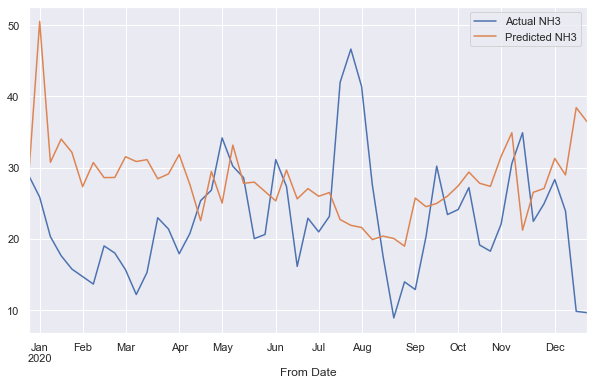

In [81]:
test['NH3'].plot(legend=True, label='Actual NH3', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NH3')

In [82]:
np.sqrt(mean_squared_error(test['NH3'],X['pred']))

11.787427767090032

In [83]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 5.967255761252441
MSE: 81.39165444362675
RMSE: 9.021732341608608
R-Squared: 0.6770989532288466


In [84]:
mae = metrics.mean_absolute_error(test['NH3'],X['pred'])
mse = metrics.mean_squared_error(test['NH3'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NH3'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 9.455693841249822
MSE: 138.94345336436507
RMSE: 11.787427767090032
R-Squared: -1.1884759486309613


In [85]:
import pickle
filename = 'NH3_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [86]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.6770989532288466


# 3rd plot

In [87]:
testcase = pd.DataFrame()

In [88]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [89]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [90]:
testcase

,test,pred,Corrected
55,44.487143,45.843972,36.822240
44,93.685714,54.715716,63.737449
108,19.232857,35.834267,26.812534
198,17.520000,19.021792,10.000060
33,20.965714,23.232765,14.211032
94,38.071429,31.808228,40.829961
95,38.545714,39.839326,30.817593
91,32.250000,28.701265,37.722998
65,32.894286,30.946799,39.968531
141,16.048571,23.469932,14.448200


In [91]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [92]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.760603898615005

In [93]:
test2020=pd.DataFrame()

In [94]:
test2020['test']=test['NH3']
test2020['pred']=X['pred']

In [95]:
test2020.index=test.index

In [96]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

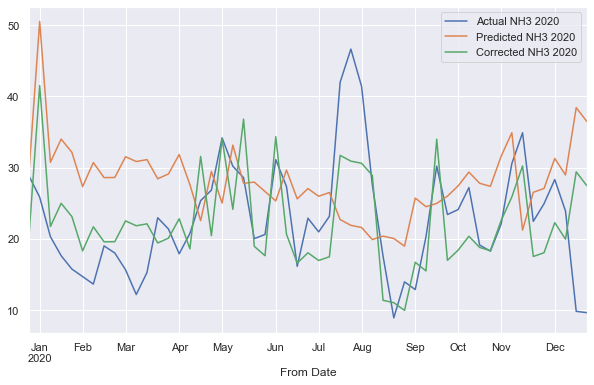

In [97]:
test2020['test'].plot(legend=True, label='Actual NH3 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NH3 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NH3 2020')

In [98]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

-0.1319795737709386